In [14]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv("abcnews-date-text.csv")
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [16]:
#droping column publish_date
data = data.drop(["publish_date"],axis = 1)
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [17]:
#lowercasing letters
data['headline_text']= data['headline_text'].str.lower()
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


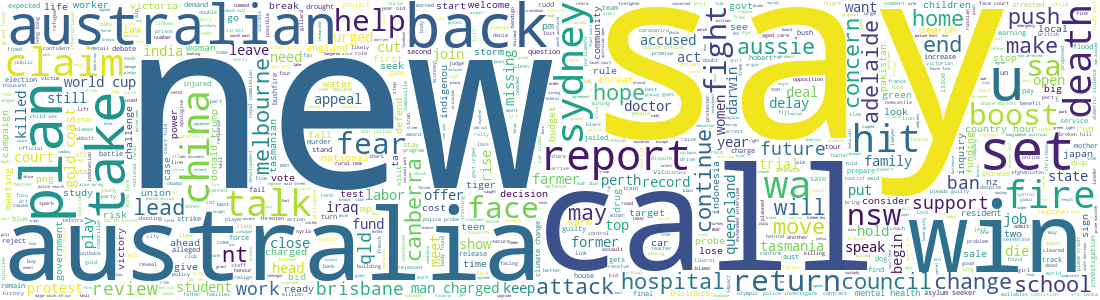

In [4]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['headline_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=6000, contour_color='steelblue',width=1100, height=300)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:s
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data2 = data.headline_text.values.tolist()
data_words = list(sent_to_words(data2))

#removed stopwords
data_words = remove_stopwords(data_words)
print(data_words)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6659308


In [19]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]

In [7]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(-1))
doc_lda = lda_model[corpus]

[(0,
  '0.009*"says" + 0.009*"australian" + 0.006*"australia" + 0.006*"day" + '
  '0.006*"new" + 0.004*"us" + 0.004*"one" + 0.004*"water" + 0.003*"ban" + '
  '0.003*"nsw"'),
 (1,
  '0.006*"council" + 0.006*"new" + 0.005*"nsw" + 0.005*"police" + 0.005*"plan" '
  '+ 0.005*"indigenous" + 0.005*"funding" + 0.004*"get" + 0.004*"govt" + '
  '0.004*"urged"'),
 (2,
  '0.014*"man" + 0.007*"crash" + 0.007*"trump" + 0.006*"car" + 0.006*"police" '
  '+ 0.006*"health" + 0.005*"dies" + 0.005*"missing" + 0.004*"new" + '
  '0.004*"woman"'),
 (3,
  '0.012*"police" + 0.007*"man" + 0.006*"world" + 0.006*"court" + '
  '0.005*"coast" + 0.005*"cup" + 0.005*"sydney" + 0.005*"child" + '
  '0.005*"queensland" + 0.004*"wa"'),
 (4,
  '0.007*"new" + 0.006*"us" + 0.006*"interview" + 0.005*"market" + '
  '0.004*"high" + 0.004*"police" + 0.003*"australia" + 0.003*"australian" + '
  '0.003*"government" + 0.003*"business"')]


In [8]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus,total_docs=30))

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\nidhi\anaconda3\lib\site-packages\gensim\models\ldamodel.py:849: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words



Perplexity:  -3046.5613063674523

Coherence Score:  0.25739573296694446


In [9]:
import pyLDAvis
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_display)

C:\Users\nidhi\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
C:\Users\nidhi\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
